In [14]:
import numpy as np;
import seaborn as sns;
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 5]

In [15]:
random_avg = pd.read_csv("result-increasing-randoms-avg.txt")
threads_avg = pd.read_csv("result-increasing-threads-avg.txt")
threads_max = pd.read_csv("result-increasing-threads-max.txt")

In [16]:
def get_keys(data):
    col = list(data.columns[2:])
    res = []
    for i in col:
        res.append(i.split("[")[0])
    return set(res)

def get_average(data):
    col = list(data.columns)
    for i in range(2, len(col), 2):
        name = col[i].split("[")[0]+"[avg (s)]"
        data[name] = data.iloc[:,i:i+2].mean(axis=1)
    return data

def get_speedup(data):
    col = list(data.columns)
    for i in range(2, len(col)):
        data[col[i]+" [speedup]"] = data[col[i]].loc[0] / data[col[i]]
    return data

In [17]:
threads_max = get_average(threads_max)
threads_avg = get_average(threads_avg)
random_avg = get_average(random_avg)

threads_max = get_speedup(threads_max)
threads_avg = get_speedup(threads_avg)
random_avg = get_speedup(random_avg)

In [18]:
def errorfill(x, y, y_min, y_max, color=None, alpha_fill=0.3, ax=None, label=None):
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    #ax.scatter(x, y, color=color)
    ax.semilogx(x, y, basex = 2, color=color, label=label)
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.legend()
    ax.fill_between(x, y_max, y_min, color=color, alpha=alpha_fill)
    return ax

<IPython.core.display.Javascript object>


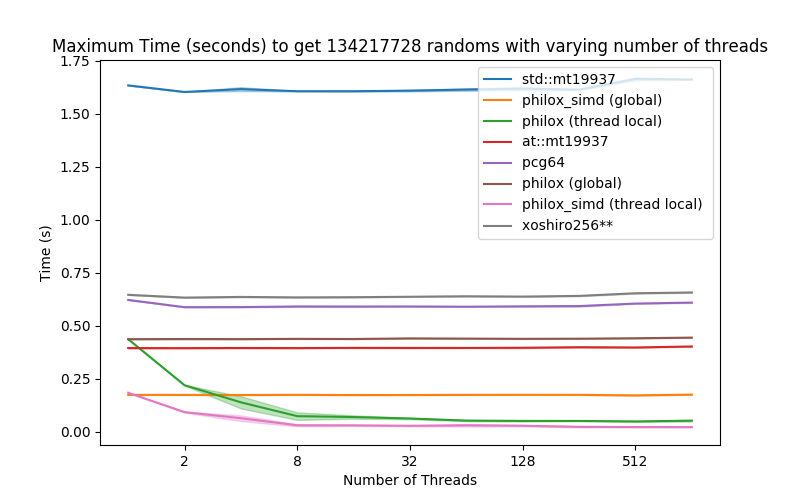

In [19]:
keys = get_keys(threads_max)
no_chunking = []
for i in keys:
    if "(chunking)" not in i:
        no_chunking.append(i)
        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in no_chunking:
    x = threads_max["Number of Threads"]
    y = threads_max[i+"[avg (s)]"]
    y_min = threads_max[i+"[best max (s)]"]
    y_max = threads_max[i+"[worst max (s)]"]
    errorfill(x, y, y_min, y_max, ax=ax, label=i)

ax.set_xlabel("Number of Threads")
ax.set_title("Maximum Time (seconds) to get 134217728 randoms with varying number of threads")
ax.set_ylabel("Time (s)")
plt.show()

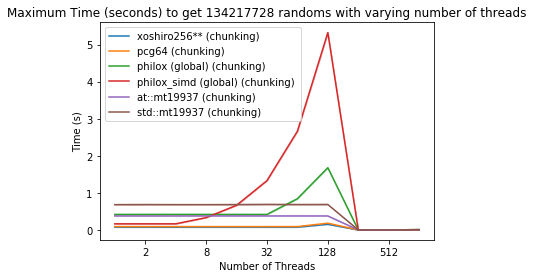

In [7]:
keys = get_keys(threads_max)
chunking = []
for i in keys:
    if "(chunking)" in i:
        chunking.append(i)
        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in chunking:
    x = threads_max["Number of Threads"]
    y = threads_max[i+"[avg (s)]"]
    y_min = threads_max[i+"[best max (s)]"]
    y_max = threads_max[i+"[worst max (s)]"]
    errorfill(x, y, y_min, y_max, ax=ax, label=i)

ax.set_xlabel("Number of Threads")
ax.set_title("Maximum Time (seconds) to get 134217728 randoms with varying number of threads")
ax.set_ylabel("Time (s)")
plt.show()

<IPython.core.display.Javascript object>


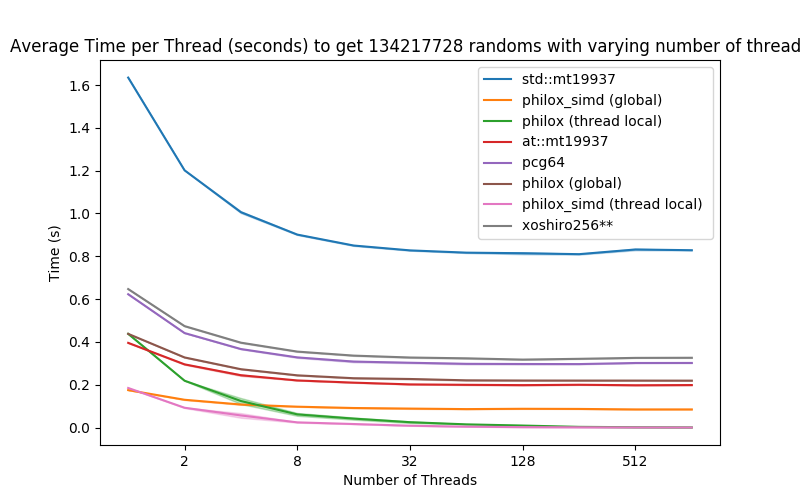

In [20]:
keys = get_keys(threads_avg)
no_chunking = []
for i in keys:
    if "(chunking)" not in i:
        no_chunking.append(i)
        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in no_chunking:
    x = threads_avg["Number of Threads"]
    y = threads_avg[i+"[avg (s)]"]
    y_min = threads_avg[i+"[best avg (s)]"]
    y_max = threads_avg[i+"[worst avg (s)]"]
    errorfill(x, y, y_min, y_max, ax=ax, label=i)

ax.set_xlabel("Number of Threads")
ax.set_title("Average Time per Thread (seconds) to get 134217728 randoms with varying number of threads")
ax.set_ylabel("Time (s)")
plt.show()

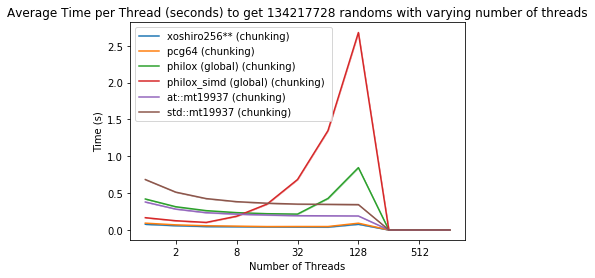

In [9]:
keys = get_keys(threads_avg)
chunking = []
for i in keys:
    if "(chunking)" in i:
        chunking.append(i)
        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in chunking:
    x = threads_avg["Number of Threads"]
    y = threads_avg[i+"[avg (s)]"]
    y_min = threads_avg[i+"[best avg (s)]"]
    y_max = threads_avg[i+"[worst avg (s)]"]
    errorfill(x, y, y_min, y_max, ax=ax, label=i)

ax.set_xlabel("Number of Threads")
ax.set_title("Average Time per Thread (seconds) to get 134217728 randoms with varying number of threads")
ax.set_ylabel("Time (s)")
plt.show()

<IPython.core.display.Javascript object>


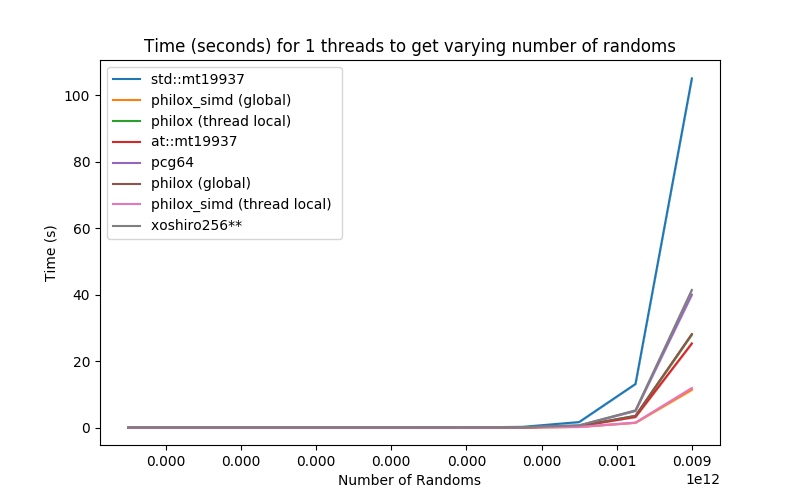

In [21]:
keys = get_keys(random_avg)
no_chunking = []
for i in keys:
    if "(chunking)" not in i:
        no_chunking.append(i)
        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in no_chunking:
    x = random_avg["Number of Randoms"]
    y = random_avg[i+"[avg (s)]"]
    y_min = random_avg[i+"[best avg (s)]"]
    y_max = random_avg[i+"[worst avg (s)]"]
    errorfill(x, y, y_min, y_max, ax=ax, label=i)

ax.set_xlabel("Number of Randoms")
ax.set_title("Time (seconds) for 1 threads to get varying number of randoms")
ax.set_ylabel("Time (s)")
plt.show()

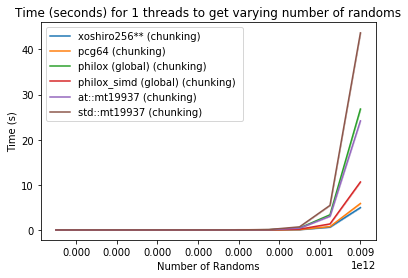

In [11]:
keys = get_keys(random_avg)
chunking = []
for i in keys:
    if "(chunking)" in i:
        chunking.append(i)
        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in chunking:
    x = random_avg["Number of Randoms"]
    y = random_avg[i+"[avg (s)]"]
    y_min = random_avg[i+"[best avg (s)]"]
    y_max = random_avg[i+"[worst avg (s)]"]
    errorfill(x, y, y_min, y_max, ax=ax, label=i)

ax.set_xlabel("Number of Randoms")
ax.set_title("Time (seconds) for 1 threads to get varying number of randoms")
ax.set_ylabel("Time (s)")
plt.show()

<IPython.core.display.Javascript object>


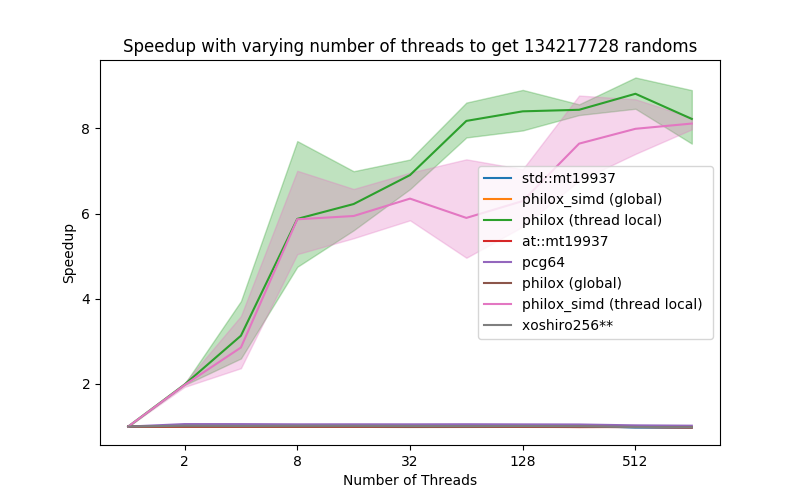

In [22]:
keys = get_keys(threads_max)
no_chunking = []
for i in keys:
    if "(chunking)" not in i:
        no_chunking.append(i)
        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in no_chunking:
    x = threads_max["Number of Threads"]
    y = threads_max[i+"[avg (s)] [speedup]"]
    y_min = threads_max[i+"[best max (s)] [speedup]"]
    y_max = threads_max[i+"[worst max (s)] [speedup]"]
    errorfill(x, y, y_min, y_max, ax=ax, label=i)

ax.set_xlabel("Number of Threads")
ax.set_title("Speedup with varying number of threads to get 134217728 randoms")
ax.set_ylabel("Speedup")
plt.show()

<IPython.core.display.Javascript object>


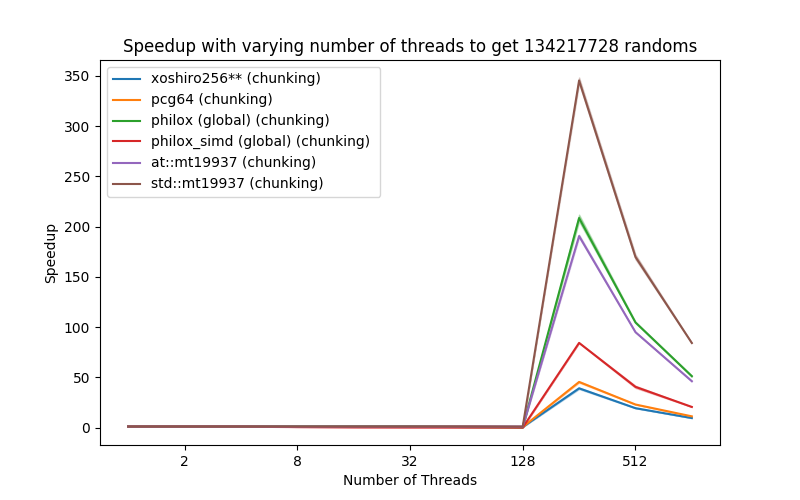

In [23]:
keys = get_keys(threads_max)
chunking = []
for i in keys:
    if "(chunking)" in i:
        chunking.append(i)
        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in chunking:
    x = threads_max["Number of Threads"]
    y = threads_max[i+"[avg (s)] [speedup]"]
    y_min = threads_max[i+"[best max (s)] [speedup]"]
    y_max = threads_max[i+"[worst max (s)] [speedup]"]
    errorfill(x, y, y_min, y_max, ax=ax, label=i)

ax.set_xlabel("Number of Threads")
ax.set_title("Speedup with varying number of threads to get 134217728 randoms")
ax.set_ylabel("Speedup")
plt.show()